In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Wavelet Features

## Load Data

In [ ]:
df_time=pd.read_csv("/content/drive/MyDrive/JHU/MLMA/MLMA Project/BS-HMS-Dataset/all_persons_features.csv")

In [ ]:
df_time

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,Test
0,23948.212043,0.114477,0.332606,0.091983,-0.141396,0.004454,23912.058097,-5.090786,-1.491028,-1.816503,...,-0.922225,-0.342368,-0.008797,23947.785568,-0.138773,0.263904,0.161817,-0.021692,0.004548,EEG_Test0_1
1,23934.374036,2.852079,0.256122,0.035535,0.008744,0.000329,23938.140667,1.304878,0.523035,-0.000734,...,0.123359,0.069284,0.000440,23936.427631,2.035387,0.329784,-0.032609,0.192239,-0.001187,EEG_Test0_2
2,23958.823237,-0.403195,-0.085348,0.090591,-0.076419,0.002789,23963.298887,1.335970,0.798692,-0.751814,...,0.998350,0.227824,0.018134,23963.144427,-0.341884,-0.095610,0.030200,-0.066442,0.003880,EEG_Test0_3
3,23969.736876,-0.738860,0.203005,-0.008236,0.168204,0.003106,23969.644167,-4.001203,-0.188962,0.233066,...,0.120797,0.007305,0.001021,23956.820391,-1.987978,-0.512351,0.092099,0.072553,-0.000021,EEG_Test0_4
4,23948.072472,-0.173193,0.157899,0.046353,-0.059603,-0.002456,23951.364927,0.655335,-0.060575,0.085118,...,0.058674,-0.071531,0.000209,23955.644776,-2.499911,-0.072077,0.003461,-0.041627,-0.002911,EEG_Test0_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,23983.084321,1.533391,0.237576,-0.078016,-0.058969,0.001908,23980.416319,0.491757,0.100662,-0.019101,...,-0.031140,0.195526,-0.001856,23979.440825,1.298427,0.133997,-0.069612,-0.178514,0.001823,EEG_Test26_4
212,23927.523788,1.171575,0.279307,0.086692,0.145100,0.002786,23929.524102,1.511335,0.700155,0.129721,...,0.001938,0.110987,0.004296,23926.416068,2.180047,0.453251,0.113384,0.091799,0.003759,EEG_Test26_5
213,23951.509630,-0.487477,0.122966,-0.023049,-0.072993,0.004537,23951.673480,-1.582431,0.758108,-0.096076,...,0.162380,0.074365,0.003413,23950.856864,0.260691,0.227889,-0.016642,0.095920,0.000546,EEG_Test26_6
214,23965.258979,-0.179881,0.069529,-0.105300,-0.108697,-0.000655,23965.454197,-1.797909,-0.710798,-0.041174,...,-0.084029,-0.141468,0.005208,23964.440151,0.364880,0.262933,-0.173946,-0.076394,0.003002,EEG_Test26_7


In [ ]:
rows_to_drop = ['Test20', 'Test21', 'Test27']
df_time_filtered = df_time[~df_time['Test'].str.contains('|'.join(rows_to_drop))]
df_time_filtered=df_time_filtered.reset_index().iloc[:,1:]

In [ ]:
df_time_filtered

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,Test
0,23948.212043,0.114477,0.332606,0.091983,-0.141396,0.004454,23912.058097,-5.090786,-1.491028,-1.816503,...,-0.922225,-0.342368,-0.008797,23947.785568,-0.138773,0.263904,0.161817,-0.021692,0.004548,EEG_Test0_1
1,23934.374036,2.852079,0.256122,0.035535,0.008744,0.000329,23938.140667,1.304878,0.523035,-0.000734,...,0.123359,0.069284,0.000440,23936.427631,2.035387,0.329784,-0.032609,0.192239,-0.001187,EEG_Test0_2
2,23958.823237,-0.403195,-0.085348,0.090591,-0.076419,0.002789,23963.298887,1.335970,0.798692,-0.751814,...,0.998350,0.227824,0.018134,23963.144427,-0.341884,-0.095610,0.030200,-0.066442,0.003880,EEG_Test0_3
3,23969.736876,-0.738860,0.203005,-0.008236,0.168204,0.003106,23969.644167,-4.001203,-0.188962,0.233066,...,0.120797,0.007305,0.001021,23956.820391,-1.987978,-0.512351,0.092099,0.072553,-0.000021,EEG_Test0_4
4,23948.072472,-0.173193,0.157899,0.046353,-0.059603,-0.002456,23951.364927,0.655335,-0.060575,0.085118,...,0.058674,-0.071531,0.000209,23955.644776,-2.499911,-0.072077,0.003461,-0.041627,-0.002911,EEG_Test0_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,23983.084321,1.533391,0.237576,-0.078016,-0.058969,0.001908,23980.416319,0.491757,0.100662,-0.019101,...,-0.031140,0.195526,-0.001856,23979.440825,1.298427,0.133997,-0.069612,-0.178514,0.001823,EEG_Test26_4
196,23927.523788,1.171575,0.279307,0.086692,0.145100,0.002786,23929.524102,1.511335,0.700155,0.129721,...,0.001938,0.110987,0.004296,23926.416068,2.180047,0.453251,0.113384,0.091799,0.003759,EEG_Test26_5
197,23951.509630,-0.487477,0.122966,-0.023049,-0.072993,0.004537,23951.673480,-1.582431,0.758108,-0.096076,...,0.162380,0.074365,0.003413,23950.856864,0.260691,0.227889,-0.016642,0.095920,0.000546,EEG_Test26_6
198,23965.258979,-0.179881,0.069529,-0.105300,-0.108697,-0.000655,23965.454197,-1.797909,-0.710798,-0.041174,...,-0.084029,-0.141468,0.005208,23964.440151,0.364880,0.262933,-0.173946,-0.076394,0.003002,EEG_Test26_7


In [ ]:
metadata=pd.read_excel("/content/drive/MyDrive/JHU/MLMA/MLMA Project/BS-HMS-Dataset/Emotiv-based-Data/Demographic Details of Participants.xlsx")
metadata.columns=[
    "User ID", "Age", "Gender", "Dominant Hand", "Date / Time",
    "Video ID 1", "Video ID 2", "Date / Time", "Video ID 3", "Video ID 4"]
metadata.head()

,User ID,Age,Gender,Dominant Hand,Date / Time,Video ID 1,Video ID 2,Date / Time,Video ID 3,Video ID 4
0,Test0,27,Male,Right,08/18/2019/2:00:00 PM,15,8,08/23/2019/3:40:00 PM,2.0,11.0
1,Test1,24,Male,Right,08/18/2019/3:20:00 PM,5,5,08/22/2019/4:30:00 PM,9.0,5.0
2,test2,30,Female,Right,08/19/2019/4:20:00 PM,8,11,08/20/2019/4:40:00 PM,5.0,2.0
3,test3,25,Male,Right,08/20/2019/1:28:00 PM,14,7,08/28/2019/3:15:00 PM,15.0,1.0
4,test4,24,Male,Left,08/21/2019/3:20:00 PM,12,6,08/30/2019/5:10:00 PM,15.0,19.0


In [ ]:
metadata_video_id=metadata[["User ID","Video ID 1", "Video ID 2", "Video ID 3", "Video ID 4"]]
metadata_video_id=metadata_video_id.dropna()
metadata_video_id.head()

,User ID,Video ID 1,Video ID 2,Video ID 3,Video ID 4
0,Test0,15,8,2.0,11.0
1,Test1,5,5,9.0,5.0
2,test2,8,11,5.0,2.0
3,test3,14,7,15.0,1.0
4,test4,12,6,15.0,19.0


In [ ]:
metadata_video_id_list = metadata_video_id.drop('User ID', axis=1).values.flatten().tolist()
metadata_video_id_list = [int(item) for item in metadata_video_id_list for _ in range(2)] #to int and double the time
metadata_video_id_list = [1 if item in [1,2,5,6,13,14,15,16,17,18] else 0 for item in metadata_video_id_list] #map
df_time_filtered["Emotion"]=metadata_video_id_list

In [ ]:
df_time_filtered=df_time_filtered.drop(columns=["Test"])
df_time_filtered

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,Emotion
0,23948.212043,0.114477,0.332606,0.091983,-0.141396,0.004454,23912.058097,-5.090786,-1.491028,-1.816503,...,-0.922225,-0.342368,-0.008797,23947.785568,-0.138773,0.263904,0.161817,-0.021692,0.004548,1
1,23934.374036,2.852079,0.256122,0.035535,0.008744,0.000329,23938.140667,1.304878,0.523035,-0.000734,...,0.123359,0.069284,0.000440,23936.427631,2.035387,0.329784,-0.032609,0.192239,-0.001187,1
2,23958.823237,-0.403195,-0.085348,0.090591,-0.076419,0.002789,23963.298887,1.335970,0.798692,-0.751814,...,0.998350,0.227824,0.018134,23963.144427,-0.341884,-0.095610,0.030200,-0.066442,0.003880,0
3,23969.736876,-0.738860,0.203005,-0.008236,0.168204,0.003106,23969.644167,-4.001203,-0.188962,0.233066,...,0.120797,0.007305,0.001021,23956.820391,-1.987978,-0.512351,0.092099,0.072553,-0.000021,0
4,23948.072472,-0.173193,0.157899,0.046353,-0.059603,-0.002456,23951.364927,0.655335,-0.060575,0.085118,...,0.058674,-0.071531,0.000209,23955.644776,-2.499911,-0.072077,0.003461,-0.041627,-0.002911,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,23983.084321,1.533391,0.237576,-0.078016,-0.058969,0.001908,23980.416319,0.491757,0.100662,-0.019101,...,-0.031140,0.195526,-0.001856,23979.440825,1.298427,0.133997,-0.069612,-0.178514,0.001823,1
196,23927.523788,1.171575,0.279307,0.086692,0.145100,0.002786,23929.524102,1.511335,0.700155,0.129721,...,0.001938,0.110987,0.004296,23926.416068,2.180047,0.453251,0.113384,0.091799,0.003759,0
197,23951.509630,-0.487477,0.122966,-0.023049,-0.072993,0.004537,23951.673480,-1.582431,0.758108,-0.096076,...,0.162380,0.074365,0.003413,23950.856864,0.260691,0.227889,-0.016642,0.095920,0.000546,0
198,23965.258979,-0.179881,0.069529,-0.105300,-0.108697,-0.000655,23965.454197,-1.797909,-0.710798,-0.041174,...,-0.084029,-0.141468,0.005208,23964.440151,0.364880,0.262933,-0.173946,-0.076394,0.003002,1


## Train Test Split Method

In [ ]:
folder = [num for num in range(1, 26) for _ in range(8)]
df_time_filtered["Folder"]=folder
df_time_filtered = df_time_filtered.reset_index().iloc[:,1:]


In [ ]:
import random
folder_names = [i for i in range(1, 27)]
random.shuffle(folder_names)
train_split = int(0.8 * len(folder_names))
train_folders = folder_names[:train_split]
test_folders = folder_names[train_split:]

print(train_folders)
print(test_folders)

[26, 1, 20, 22, 2, 19, 5, 3, 8, 4, 7, 25, 15, 17, 6, 23, 14, 18, 13, 12]
[9, 16, 24, 11, 10, 21]


In [ ]:
train_time = df_time_filtered[df_time_filtered['Folder'].isin(train_folders)]
X_train_time =train_time.iloc[:,:-2]
y_train_time=train_time.iloc[:,-2]

test_time = df_time_filtered[df_time_filtered['Folder'].isin(test_folders)]
X_test_time =test_time.iloc[:,:-2]
y_test_time=test_time.iloc[:,-2]

## DNN model + Cross Validation

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import LambdaCallback


def create_model(input_shape):
    model = Sequential()
    model.add(Dense(64, input_shape=(input_shape,), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

batch_size=64

In [ ]:
fold=20
cv_scores = []
best_model_time = 0
best_accuracy_time = 0
train_folders_name=train_folders
for i in range(fold):

    random.shuffle(train_folders_name)
    train_split_cv = int(0.9 * len(train_folders_name))
    train_folders_cv = train_folders_name[:train_split_cv]
    val_folders_cv = train_folders_name[train_split_cv:]

    train_cv = train_time[train_time['Folder'].isin(train_folders_cv)]
    X_train_cv =train_cv.iloc[:,:-2]
    y_train_cv=train_cv.iloc[:,-2]
    val_cv = train_time[train_time['Folder'].isin(val_folders_cv)]
    X_val_cv =val_cv.iloc[:,:-2]
    y_val_cv=val_cv.iloc[:,-2]
    model_time = create_model(X_train_cv.shape[1])

    print_callback = LambdaCallback(on_epoch_end=lambda epoch, logs:
                                    print(f"Epoch: {epoch+1}, Loss: {logs['loss']:.4f}, Accuracy: {logs['accuracy']:.4f}")
                                    if (epoch+1) % 20 == 0 else None)


    history = model_time.fit(X_train_cv, y_train_cv,
                             epochs=100,
                             batch_size=batch_size,
                             verbose=0,
                             callbacks=[print_callback],
                             validation_data=(X_val_cv, y_val_cv))


    val_predictions = (model_time.predict(X_val_cv) > 0.5).astype("int32")
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores.append(val_accuracy)
    print(f"Fold completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    if val_accuracy > best_accuracy_time:
        best_accuracy_time = val_accuracy
        best_model_time = model_time

print(f"Best validation accuracy: {best_accuracy_time * 100:.2f}%")


Epoch: 20, Loss: 43.3407, Accuracy: 0.4412
Epoch: 40, Loss: 36.8494, Accuracy: 0.5735
Epoch: 60, Loss: 143.7731, Accuracy: 0.5588
Epoch: 80, Loss: 79.8118, Accuracy: 0.5882
Epoch: 100, Loss: 64.3882, Accuracy: 0.4412
1/1 [==============================] - 0s 89ms/step
Fold completed. Validation accuracy: 50.00%
Epoch: 20, Loss: 161.0868, Accuracy: 0.4853
Epoch: 40, Loss: 37.5580, Accuracy: 0.5441
Epoch: 60, Loss: 237.1718, Accuracy: 0.5294
Epoch: 80, Loss: 56.3211, Accuracy: 0.4559
Epoch: 100, Loss: 134.1751, Accuracy: 0.5294
1/1 [==============================] - 0s 57ms/step
Fold completed. Validation accuracy: 75.00%
Epoch: 20, Loss: 51.9150, Accuracy: 0.4706
Epoch: 40, Loss: 139.1774, Accuracy: 0.4559
Epoch: 60, Loss: 49.1078, Accuracy: 0.5588
Epoch: 80, Loss: 33.4829, Accuracy: 0.4265
Epoch: 100, Loss: 79.2695, Accuracy: 0.4412
1/1 [==============================] - 0s 54ms/step
Fold completed. Validation accuracy: 75.00%
Epoch: 20, Loss: 223.5780, Accuracy: 0.5441
Epoch: 40, Loss

1/1 [==============================] - 0s 91ms/step
Fold completed. Validation accuracy: 50.00%
Epoch: 20, Loss: 93.3853, Accuracy: 0.4706
Epoch: 40, Loss: 71.2764, Accuracy: 0.5074
Epoch: 60, Loss: 34.6850, Accuracy: 0.4853
Epoch: 80, Loss: 74.6842, Accuracy: 0.4853
Epoch: 100, Loss: 148.9633, Accuracy: 0.5294


1/1 [==============================] - 0s 60ms/step
Fold completed. Validation accuracy: 25.00%
Epoch: 20, Loss: 120.7867, Accuracy: 0.5735
Epoch: 40, Loss: 161.7819, Accuracy: 0.5147
Epoch: 60, Loss: 74.3777, Accuracy: 0.4559
Epoch: 80, Loss: 111.2569, Accuracy: 0.5147
Epoch: 100, Loss: 380.0259, Accuracy: 0.5294
1/1 [==============================] - 0s 81ms/step
Fold completed. Validation accuracy: 50.00%
Epoch: 20, Loss: 166.3263, Accuracy: 0.4412
Epoch: 40, Loss: 97.5362, Accuracy: 0.5441
Epoch: 60, Loss: 59.8207, Accuracy: 0.5221
Epoch: 80, Loss: 183.4286, Accuracy: 0.5588
Epoch: 100, Loss: 35.5684, Accuracy: 0.5147
1/1 [==============================] - 0s 62ms/step
Fold completed. Validation accuracy: 50.00%
Epoch: 20, Loss: 182.5238, Accuracy: 0.5441
Epoch: 40, Loss: 99.2492, Accuracy: 0.5735
Epoch: 60, Loss: 226.4873, Accuracy: 0.5441
Epoch: 80, Loss: 56.7990, Accuracy: 0.4706
Epoch: 100, Loss: 157.1605, Accuracy: 0.4559
1/1 [==============================] - 0s 57ms/step
Fol

In [ ]:
print(train_folders_cv)
print(val_folders_cv)

[23, 26, 3, 2, 14, 25, 12, 22, 17, 8, 13, 6, 5, 15, 7, 20, 1, 4]
[18, 19]


# Evaluation

2/2 [==============================] - 0s 9ms/step
Test Accuracy: 37.50%


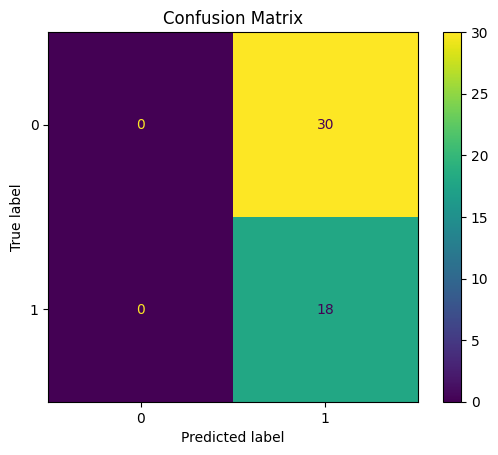

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.38      1.00      0.55        18

    accuracy                           0.38        48
   macro avg       0.19      0.50      0.27        48
weighted avg       0.14      0.38      0.20        48



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_time = (best_model_time.predict(X_test_time) > 0.5).astype("int32")

# Calculate test accuracy
test_accuracy_time = accuracy_score(y_test_time, y_pred_time)
print(f"Test Accuracy: {test_accuracy_time * 100:.2f}%")

# Generate the confusion matrix
conf_matrix_time = confusion_matrix(y_test_time, y_pred_time)

# Plot the confusion matrix
ConfusionMatrixDisplay(conf_matrix_time).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report_time = classification_report(y_test_time, y_pred_time)
print("Classification Report:")
print(report_time)
